In [91]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
%matplotlib inline

In [5]:
data = pd.read_csv('big_outputs.csv', names=["X", "O", "Winner"])
data.head()

,X,O,Winner
0,bekk/getem.py,lance/tictactoe.py,bekk/getem.py
1,bekk/getem.py,lance/worse_bot.py,bekk/getem.py
2,bekk/getem.py,pj/annoy_bot.py,bekk/getem.py
3,bekk/getem.py,pj/random_bot.py,bekk/getem.py
4,bekk/getem.py,pj/think_ahead_bot.py,tie


In [6]:
results = data[data.X == "bekk/getem.py"]

In [7]:
results.X

0       bekk/getem.py
1       bekk/getem.py
2       bekk/getem.py
3       bekk/getem.py
4       bekk/getem.py
5       bekk/getem.py
6       bekk/getem.py
56      bekk/getem.py
57      bekk/getem.py
58      bekk/getem.py
59      bekk/getem.py
60      bekk/getem.py
61      bekk/getem.py
62      bekk/getem.py
112     bekk/getem.py
113     bekk/getem.py
114     bekk/getem.py
115     bekk/getem.py
116     bekk/getem.py
117     bekk/getem.py
118     bekk/getem.py
168     bekk/getem.py
169     bekk/getem.py
170     bekk/getem.py
171     bekk/getem.py
172     bekk/getem.py
173     bekk/getem.py
174     bekk/getem.py
224     bekk/getem.py
225     bekk/getem.py
            ...      
845     bekk/getem.py
846     bekk/getem.py
896     bekk/getem.py
897     bekk/getem.py
898     bekk/getem.py
899     bekk/getem.py
900     bekk/getem.py
901     bekk/getem.py
902     bekk/getem.py
952     bekk/getem.py
953     bekk/getem.py
954     bekk/getem.py
955     bekk/getem.py
956     bekk/getem.py
957     be

In [8]:
results[results.O == results.Winner]


,X,O,Winner


In [9]:
new_results = data[(data.O == 'bekk/getem.py') & (data.Winner == data.X)] 

In [10]:
new_results

,X,O,Winner
427,pj/think_ahead_bot.py,bekk/getem.py,pj/think_ahead_bot.py


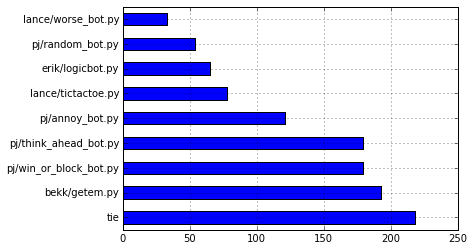

In [17]:
data.Winner.value_counts().plot(kind="barh")

In [43]:
# bot # X wins # 0 wins # tie
df = data

In [44]:
df = pd.DataFrame(list(set(df.X)), columns=["Bot"])

In [46]:
df.index = df.Bot

In [47]:
df

,Bot
Bot,
pj/random_bot.py,pj/random_bot.py
lance/worse_bot.py,lance/worse_bot.py
bekk/getem.py,bekk/getem.py
pj/win_or_block_bot.py,pj/win_or_block_bot.py
pj/annoy_bot.py,pj/annoy_bot.py
erik/logicbot.py,erik/logicbot.py
pj/think_ahead_bot.py,pj/think_ahead_bot.py
lance/tictactoe.py,lance/tictactoe.py


In [51]:
data.X[data.X == data.Winner].value_counts()

bekk/getem.py             99
pj/win_or_block_bot.py    99
pj/think_ahead_bot.py     98
pj/annoy_bot.py           71
lance/tictactoe.py        52
erik/logicbot.py          42
pj/random_bot.py          41
lance/worse_bot.py        22
dtype: int64

In [56]:
new_df = pd.DataFrame(data.X[data.X == data.Winner].value_counts())

In [57]:
new_df

,0
bekk/getem.py,99
pj/win_or_block_bot.py,99
pj/think_ahead_bot.py,98
pj/annoy_bot.py,71
lance/tictactoe.py,52
erik/logicbot.py,42
pj/random_bot.py,41
lance/worse_bot.py,22


In [59]:
o_wins_series = data.O[data.O == data.Winner].value_counts()

In [65]:
bigger_df = pd.merge(new_df, o_wins_series.to_frame(), right_index=True, left_index=True)

In [66]:
bigger_df

,0_x,0_y
bekk/getem.py,99,94
pj/think_ahead_bot.py,98,81
pj/win_or_block_bot.py,99,80
pj/annoy_bot.py,71,50
lance/tictactoe.py,52,26
erik/logicbot.py,42,23
pj/random_bot.py,41,13
lance/worse_bot.py,22,11


In [69]:
x_ties_series = data.X[data.Winner == "tie"].value_counts()

In [71]:
x_ties_series

pj/think_ahead_bot.py     42
pj/win_or_block_bot.py    41
bekk/getem.py             41
pj/random_bot.py          29
erik/logicbot.py          23
lance/worse_bot.py        22
lance/tictactoe.py        12
pj/annoy_bot.py            8
dtype: int64

In [73]:
even_bigger_df = pd.merge(bigger_df, x_ties_series.to_frame(), right_index=True, left_index=True)

In [74]:
even_bigger_df

,0_x,0_y,0
pj/think_ahead_bot.py,98,81,42
pj/win_or_block_bot.py,99,80,41
bekk/getem.py,99,94,41
pj/random_bot.py,41,13,29
erik/logicbot.py,42,23,23
lance/worse_bot.py,22,11,22
lance/tictactoe.py,52,26,12
pj/annoy_bot.py,71,50,8


In [79]:
o_ties_frame = data.O[data.Winner == "tie"].value_counts().to_frame()
o_ties_frame

,0
pj/think_ahead_bot.py,59
pj/win_or_block_bot.py,56
bekk/getem.py,45
pj/random_bot.py,21
pj/annoy_bot.py,11
lance/worse_bot.py,11
erik/logicbot.py,8
lance/tictactoe.py,7


In [85]:
biggest_df = pd.merge(even_bigger_df, o_ties_frame, left_index=True, right_index=True)

In [86]:
biggest_df.columns = ["X Wins", "O Wins", "X Ties", "O Ties"]

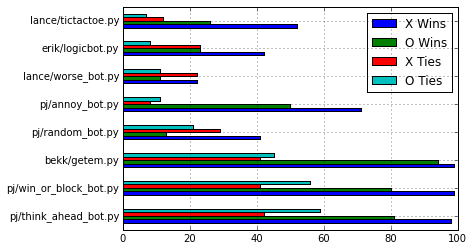

In [90]:
biggest_df.plot(kind="barh")